In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
def noise_removal(pixel, kernal_size, threshold):
    pixel_initial = pixel.copy().reshape(3,32,32)
    pixel_cleaned = pixel_initial.copy()
    length = int((kernal_size-1)/2)
    
    for i in range(3):
        for x,y in zip(pixel_initial[i].nonzero()[0], pixel_initial[i].nonzero()[1]):
            x1, x2 = max(0, x-length), min(31, x+length)
            y1, y2 = max(0, y-length), min(31, y+length)
            if (pixel_initial[i,x1:(x2+1),y1:(y2+1)].sum()<threshold):
                pixel_cleaned[i,x,y] = 0
    
    return pixel_cleaned.reshape(3072)

In [ ]:
def clf_sim_cut(matrix, threshold):
    matrix_copy = matrix.copy().reshape(3,1024)
    cut_results = np.zeros(3)
    clf = 0
    for i in range(3):
        npe = matrix_copy[i].sum()
        if (npe>threshold):
            cut_results[i]=1
            clf = 1
    return clf, cut_results

## training, pixel

In [60]:
file_pim = open("data/sim/pim_1e5_pixel_hit.txt")
file_pim_raw = open("data/sim/pim_1e5_pixel_raw.txt")
file_kam = open("data/sim/kam_1e5_pixel_hit.txt")
file_kam_raw = open("data/sim/kam_1e5_pixel_raw.txt")
npe_pim = np.zeros(100000)
npe_pim_raw = np.zeros(100000)
npe_kam = np.zeros(100000)
npe_kam_raw = np.zeros(100000)
npe_pim_cleaned = np.zeros(100000)
npe_pim_raw_cleaned = np.zeros(100000)
npe_kam_cleaned = np.zeros(100000)
npe_kam_raw_cleaned = np.zeros(100000)

for i in range(100000):
    hits = file_pim_raw.readline()
    hits = np.fromstring(hits, sep="\t", dtype=int)[1:]
    pixel = np.zeros(3072)
    pixel[hits] = 1
    npe_pim_raw[i] = pixel.reshape(3,1024).sum(axis=1).max()
    npe_pim_raw_cleaned[i] = noise_removal(pixel, kernal_size=3, threshold=3).reshape(3,1024).sum(axis=1).max()
for i in range(100000):
    hits = file_pim.readline()
    hits = np.fromstring(hits, sep="\t", dtype=int)[1:]
    pixel = np.zeros(3072)
    pixel[hits] = 1
    npe_pim[i] = pixel.reshape(3,1024).sum(axis=1).max()
    npe_pim_cleaned[i] = noise_removal(pixel, kernal_size=3, threshold=3).reshape(3,1024).sum(axis=1).max()
for i in range(100000):
    hits = file_kam_raw.readline()
    hits = np.fromstring(hits, sep="\t", dtype=int)[1:]
    pixel = np.zeros(3072)
    pixel[hits] = 1
    npe_kam_raw[i] = pixel.reshape(3,1024).sum(axis=1).max()
    npe_kam_raw_cleaned[i] = noise_removal(pixel, kernal_size=3, threshold=3).reshape(3,1024).sum(axis=1).max()
for i in range(100000):
    hits = file_kam.readline()
    hits = np.fromstring(hits, sep="\t", dtype=int)[1:]
    pixel = np.zeros(3072)
    pixel[hits] = 1
    npe_kam[i] = pixel.reshape(3,1024).sum(axis=1).max()
    npe_kam_cleaned[i] = noise_removal(pixel, kernal_size=3, threshold=3).reshape(3,1024).sum(axis=1).max()

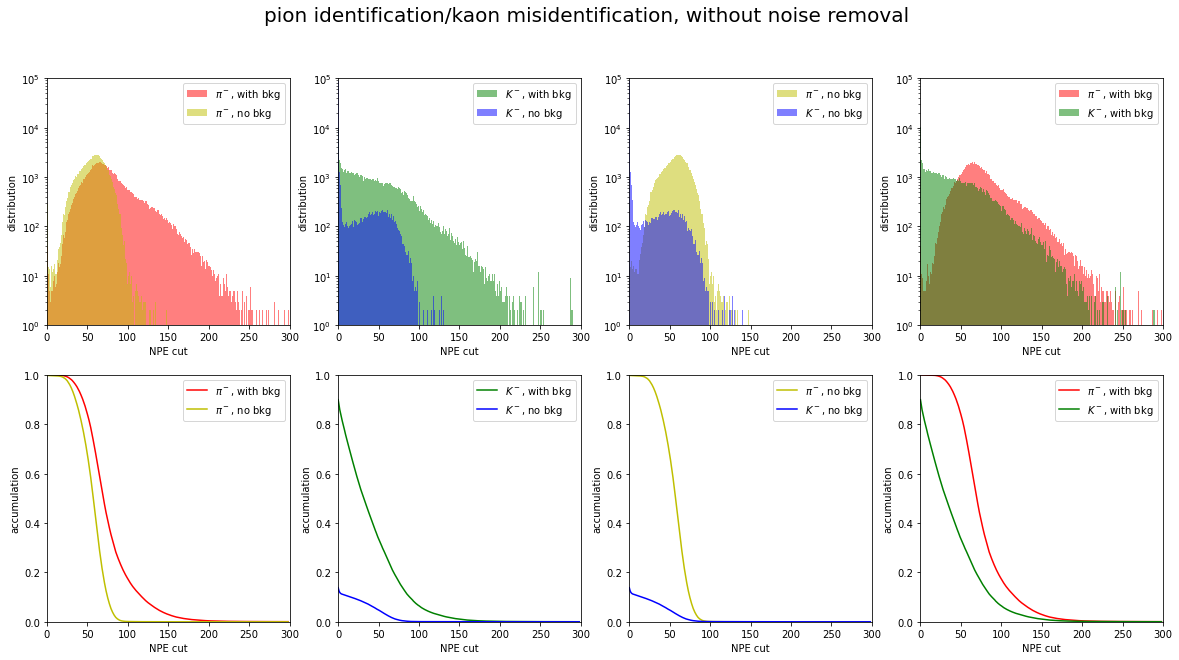

In [171]:
fig, axs = plt.subplots(2,4,figsize=(20,10))

hist_pim = axs[0,0].hist(npe_pim, bins=np.arange(300), alpha=0.5, color='r', label='$\pi^-$, with bkg')
hist_pim_raw = axs[0,0].hist(npe_pim_raw, bins=np.arange(300), alpha=0.5, color='y', label='$\pi^-$, no bkg')

hist_kam = axs[0,1].hist(npe_kam, bins=np.arange(300), alpha=0.5, color='g', label='$K^-$, with bkg')
hist_kam_raw = axs[0,1].hist(npe_kam_raw, bins=np.arange(300), alpha=0.5, color='b', label='$K^-$, no bkg')

hist_pim_raw = axs[0,2].hist(npe_pim_raw, bins=np.arange(300), alpha=0.5, color='y', label='$\pi^-$, no bkg')
hist_kam_raw = axs[0,2].hist(npe_kam_raw, bins=np.arange(300), alpha=0.5, color='b', label='$K^-$, no bkg')

hist_pim = axs[0,3].hist(npe_pim, bins=np.arange(300), alpha=0.5, color='r', label='$\pi^-$, with bkg')
hist_kam = axs[0,3].hist(npe_kam, bins=np.arange(300), alpha=0.5, color='g', label='$K^-$, with bkg')

axs[1,0].plot(1-np.cumsum(hist_pim[0])/1e5,color='r', label='$\pi^-$, with bkg')
axs[1,0].plot(1-np.cumsum(hist_pim_raw[0])/1e5,color='y', label='$\pi^-$, no bkg')

axs[1,1].plot(1-np.cumsum(hist_kam[0])/1e5,color='g', label='$K^-$, with bkg')
axs[1,1].plot(1-np.cumsum(hist_kam_raw[0])/1e5,color='b', label='$K^-$, no bkg')

axs[1,2].plot(1-np.cumsum(hist_pim_raw[0])/1e5,color='y', label='$\pi^-$, no bkg')
axs[1,2].plot(1-np.cumsum(hist_kam_raw[0])/1e5,color='b', label='$K^-$, no bkg')

axs[1,3].plot(1-np.cumsum(hist_pim[0])/1e5,color='r', label='$\pi^-$, with bkg')
axs[1,3].plot(1-np.cumsum(hist_kam[0])/1e5,color='g', label='$K^-$, with bkg')

fig.suptitle("pion identification/kaon misidentification, without noise removal",fontsize=20)
for i in range(2):
    for j in range(4):
        axs[i,j].legend(fontsize=10)
        axs[i,j].set_xlabel("NPE cut")
        axs[i,j].set_xlim([0,300])
        if(i==0):
            axs[i,j].set_yscale('log')
            axs[i,j].set_ylabel("density")
            axs[i,j].set_ylim([1,1e5])
        elif(i==1):
            axs[i,j].set_ylabel("accuracy")
            axs[i,j].set_ylim([0,1])     

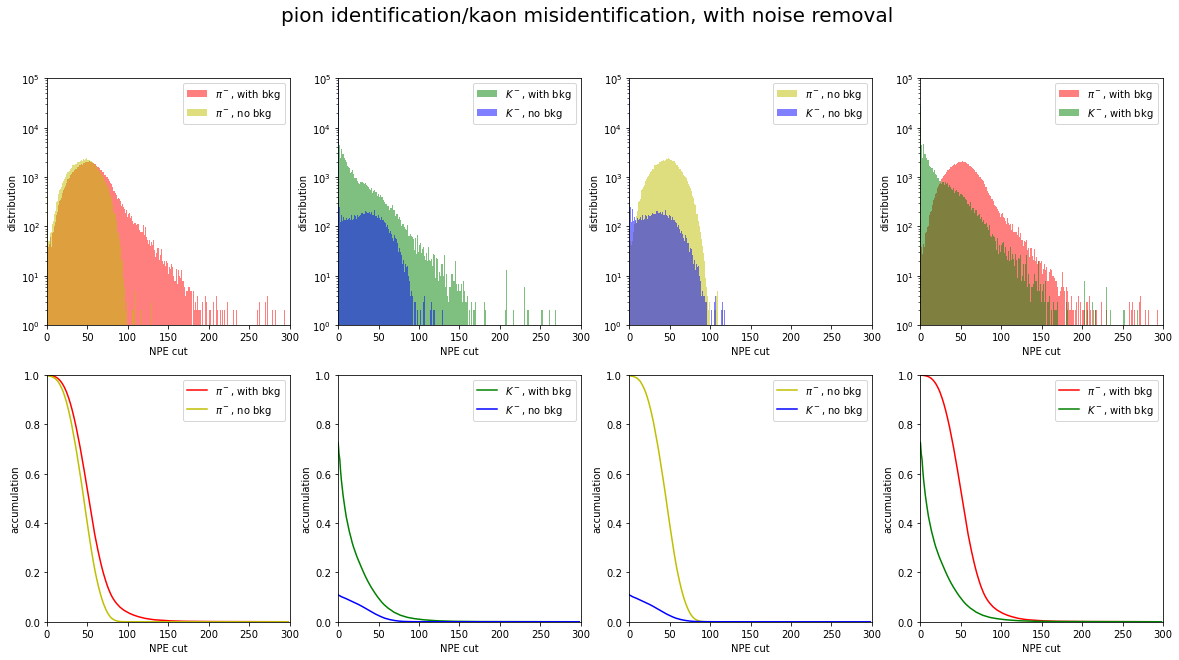

In [170]:
fig, axs = plt.subplots(2,4,figsize=(20,10))

hist_pim_cleaned = axs[0,0].hist(npe_pim_cleaned, bins=np.arange(300), alpha=0.5, color='r', label='$\pi^-$, with bkg')
hist_pim_raw_cleaned = axs[0,0].hist(npe_pim_raw_cleaned, bins=np.arange(300), alpha=0.5, color='y', label='$\pi^-$, no bkg')

hist_kam_cleaned = axs[0,1].hist(npe_kam_cleaned, bins=np.arange(300), alpha=0.5, color='g', label='$K^-$, with bkg')
hist_kam_raw_cleaned = axs[0,1].hist(npe_kam_raw_cleaned, bins=np.arange(300), alpha=0.5, color='b', label='$K^-$, no bkg')

hist_pim_raw_cleaned = axs[0,2].hist(npe_pim_raw_cleaned, bins=np.arange(300), alpha=0.5, color='y', label='$\pi^-$, no bkg')
hist_kam_raw_cleaned = axs[0,2].hist(npe_kam_raw_cleaned, bins=np.arange(300), alpha=0.5, color='b', label='$K^-$, no bkg')

hist_pim_cleaned = axs[0,3].hist(npe_pim_cleaned, bins=np.arange(300), alpha=0.5, color='r', label='$\pi^-$, with bkg')
hist_kam_cleaned = axs[0,3].hist(npe_kam_cleaned, bins=np.arange(300), alpha=0.5, color='g', label='$K^-$, with bkg')

axs[1,0].plot(1-np.cumsum(hist_pim_cleaned[0])/1e5,color='r', label='$\pi^-$, with bkg')
axs[1,0].plot(1-np.cumsum(hist_pim_raw_cleaned[0])/1e5,color='y', label='$\pi^-$, no bkg')

axs[1,1].plot(1-np.cumsum(hist_kam_cleaned[0])/1e5,color='g', label='$K^-$, with bkg')
axs[1,1].plot(1-np.cumsum(hist_kam_raw_cleaned[0])/1e5,color='b', label='$K^-$, no bkg')

axs[1,2].plot(1-np.cumsum(hist_pim_raw_cleaned[0])/1e5,color='y', label='$\pi^-$, no bkg')
axs[1,2].plot(1-np.cumsum(hist_kam_raw_cleaned[0])/1e5,color='b', label='$K^-$, no bkg')

axs[1,3].plot(1-np.cumsum(hist_pim_cleaned[0])/1e5,color='r', label='$\pi^-$, with bkg')
axs[1,3].plot(1-np.cumsum(hist_kam_cleaned[0])/1e5,color='g', label='$K^-$, with bkg')

fig.suptitle("pion identification/kaon misidentification, with noise removal",fontsize=20)
for i in range(2):
    for j in range(4):
        axs[i,j].legend(fontsize=10)
        axs[i,j].set_xlabel("NPE cut")
        axs[i,j].set_xlim([0,300])
        if(i==0):
            axs[i,j].set_yscale('log')
            axs[i,j].set_ylabel("density")
            axs[i,j].set_ylim([1,1e5])
        elif(i==1):
            axs[i,j].set_ylabel("accuracy")
            axs[i,j].set_ylim([0,1]) 

Text(0.5, 0.98, 'accuracy curve')

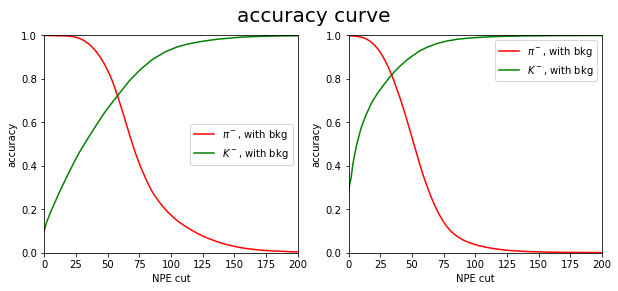

In [174]:
fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(1-np.cumsum(hist_pim[0])/1e5,color='r', label='$\pi^-$, with bkg')
axs[0].plot(np.cumsum(hist_kam[0])/1e5,color='g', label='$K^-$, with bkg')

axs[1].plot(1-np.cumsum(hist_pim_cleaned[0])/1e5,color='r', label='$\pi^-$, with bkg')
axs[1].plot(np.cumsum(hist_kam_cleaned[0])/1e5,color='g', label='$K^-$, with bkg')

fig.suptitle("accuracy curve", fontsize=20)
for i in range(2):
    axs[i].legend(fontsize=10)
    axs[i].set_xlabel("NPE cut")
    axs[i].set_ylabel("accuracy")
    axs[i].set_xlim([0,200])
    axs[i].set_ylim([0,1])